https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/

https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk

https://www.machinelearningplus.com/nlp/lemmatization-examples-python/

https://www.digitalocean.com/community/tutorials/how-to-perform-sentiment-analysis-in-python-3-using-the-natural-language-toolkit-nltk

reference

https://github.com/t-davidson/hate-speech-and-offensive-language/blob/master/classifier/classifier.py

https://github.com/NakulLakhotia/Hate-Speech-Detection-in-Social-Media-using-Python/blob/master/final_customization.ipynb

#  Python Django

In [1]:
# !pip install Django
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from textstat.textstat import *
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /Users/ching/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/ching/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/ching/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ching/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# read dataset1 csv file

data_tweet = pd.read_csv("/Users/ching/Desktop/Class/Data Project Management/AI and Big Data Project/Class 1/Dataset1_labeled_data.csv", sep = ",")

data_tweet.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
# summary of the dataset

data_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [4]:
# extract the tweet column, make all words to lowercase, and remove redundant space

data_tweet_str = data_tweet['tweet'].apply(lambda x: ' '.join(x.lower().strip() for x in x.split()))
data_tweet_str

0        !!! rt @mayasolovely: as a woman you shouldn't...
1        !!!!! rt @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby...
3        !!!!!!!!! rt @c_g_anderson: @viva_based she lo...
4        !!!!!!!!!!!!! rt @shenikaroberts: the shit you...
                               ...                        
24778    you's a muthaf***in lie &#8220;@lifeasking: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like i ain...
24781                youu got wild bitches tellin you lies
24782    ~~ruffled | ntac eileen dahlia - beautiful col...
Name: tweet, Length: 24783, dtype: object

In [5]:
# remove user names

data_tweet_wo_user = data_tweet_str.apply(lambda x: " ".join(x for x in x.split() if x[0] != '@'))
data_tweet_wo_user

0        !!! rt as a woman you shouldn't complain about...
1        !!!!! rt boy dats cold...tyga dwn bad for cuff...
2        !!!!!!! rt dawg!!!! rt you ever fuck a bitch a...
3                      !!!!!!!!! rt she look like a tranny
4        !!!!!!!!!!!!! rt the shit you hear about me mi...
                               ...                        
24778    you's a muthaf***in lie &#8220;@lifeasking: ri...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like i ain...
24781                youu got wild bitches tellin you lies
24782    ~~ruffled | ntac eileen dahlia - beautiful col...
Name: tweet, Length: 24783, dtype: object

In [6]:
# remove all punctuations

data_tweet_str_wo_punc = data_tweet_wo_user.str.replace('[^\w\s]','')
data_tweet_str_wo_punc

0         rt as a woman you shouldnt complain about cle...
1         rt boy dats coldtyga dwn bad for cuffin dat h...
2         rt dawg rt you ever fuck a bitch and she star...
3                                rt she look like a tranny
4         rt the shit you hear about me might be true o...
                               ...                        
24778    yous a muthafin lie 8220lifeasking right his t...
24779    youve gone and broke the wrong heart baby and ...
24780    young buck wanna eat dat nigguh like i aint fu...
24781                youu got wild bitches tellin you lies
24782    ruffled  ntac eileen dahlia  beautiful color c...
Name: tweet, Length: 24783, dtype: object

In [7]:
# call the stopword list

stop = stopwords.words('english')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [8]:
# self-define a stopword list 

more_stopwords = ["english", "aint", "rt", 'shouldnt', 'ya', 'yea', 'another', 'yo', 'us', 'cant', 'im', 'yeah', \
                  'doesnt', 'tweets', 'tweet', 'lmao', 'Lmao', 'LMAO', 'u', 'dont', 'lol', 'amp', 'thats', 'youre', \
                  'wont', 'would']

# combine the two stopword lists together

for i in range(len(more_stopwords)):
    stop.append(more_stopwords[i])

stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [9]:
# remove stopwords

data_tweet_str_wo_punc_wo_stop = data_tweet_str_wo_punc.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data_tweet_str_wo_punc_wo_stop

0        woman complain cleaning house man always take ...
1        boy dats coldtyga dwn bad cuffin dat hoe 1st p...
2             dawg ever fuck bitch start cry confused shit
3                                         look like tranny
4        shit hear might true might faker bitch told 57361
                               ...                        
24778    yous muthafin lie 8220lifeasking right tl tras...
24779    youve gone broke wrong heart baby drove rednec...
24780      young buck wanna eat dat nigguh like fuckin dis
24781                    youu got wild bitches tellin lies
24782    ruffled ntac eileen dahlia beautiful color com...
Name: tweet, Length: 24783, dtype: object

In [10]:
# remove web address

data_tweet_str_wo_punc_wo_stop_wo_http = data_tweet_str_wo_punc_wo_stop.apply(lambda x: " ".join(x for x in x.split() \
                                                                                                 if x[0:4] != 'http'))
data_tweet_str_wo_punc_wo_stop_wo_http

0        woman complain cleaning house man always take ...
1        boy dats coldtyga dwn bad cuffin dat hoe 1st p...
2             dawg ever fuck bitch start cry confused shit
3                                         look like tranny
4        shit hear might true might faker bitch told 57361
                               ...                        
24778    yous muthafin lie 8220lifeasking right tl tras...
24779    youve gone broke wrong heart baby drove rednec...
24780      young buck wanna eat dat nigguh like fuckin dis
24781                    youu got wild bitches tellin lies
24782    ruffled ntac eileen dahlia beautiful color com...
Name: tweet, Length: 24783, dtype: object

In [11]:
# remove numbers and words starting with numbers

number = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']

data_tweet_str_wo_punc_wo_stop_wo_http_wo_no = data_tweet_str_wo_punc_wo_stop_wo_http\
                                                .apply(lambda x: " ".join(x for x in x.split() \
                                                if x[0] not in number))
data_tweet_str_wo_punc_wo_stop_wo_http_wo_no

0        woman complain cleaning house man always take ...
1           boy dats coldtyga dwn bad cuffin dat hoe place
2             dawg ever fuck bitch start cry confused shit
3                                         look like tranny
4              shit hear might true might faker bitch told
                               ...                        
24778    yous muthafin lie right tl trash mine bible sc...
24779    youve gone broke wrong heart baby drove rednec...
24780      young buck wanna eat dat nigguh like fuckin dis
24781                    youu got wild bitches tellin lies
24782    ruffled ntac eileen dahlia beautiful color com...
Name: tweet, Length: 24783, dtype: object

In [12]:
# check data cleaning results

check1 = 24
check2 = 24778

print(data_tweet_str_wo_punc_wo_stop[check1])

print(data_tweet_str_wo_punc_wo_stop_wo_http[check1])

print(data_tweet_str_wo_punc_wo_stop_wo_http_wo_no[check1], '\n')

print(data_tweet_str_wo_punc_wo_stop[check2])

print(data_tweet_str_wo_punc_wo_stop_wo_http_wo_no[check2])

got bitch tip toeing hardwood floors 128514 httptcocou2wq5l4q
got bitch tip toeing hardwood floors 128514
got bitch tip toeing hardwood floors 

yous muthafin lie 8220lifeasking right tl trash 8230 mine bible scriptures hymns8221
yous muthafin lie right tl trash mine bible scriptures hymns8221


In [13]:
# lemmatization

lemmatizer = WordNetLemmatizer() 

lemmatization = data_tweet_str_wo_punc_wo_stop_wo_http_wo_no\
                .apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
lemmatization

0        woman complain cleaning house man always take ...
1            boy dat coldtyga dwn bad cuffin dat hoe place
2             dawg ever fuck bitch start cry confused shit
3                                         look like tranny
4              shit hear might true might faker bitch told
                               ...                        
24778    yous muthafin lie right tl trash mine bible sc...
24779    youve gone broke wrong heart baby drove rednec...
24780      young buck wanna eat dat nigguh like fuckin dis
24781                       youu got wild bitch tellin lie
24782    ruffled ntac eileen dahlia beautiful color com...
Name: tweet, Length: 24783, dtype: object

In [14]:
# tokenization

tokens = lemmatization.apply(lambda x: word_tokenize(str(x)))
tokens

0        [woman, complain, cleaning, house, man, always...
1        [boy, dat, coldtyga, dwn, bad, cuffin, dat, ho...
2        [dawg, ever, fuck, bitch, start, cry, confused...
3                                     [look, like, tranny]
4        [shit, hear, might, true, might, faker, bitch,...
                               ...                        
24778    [yous, muthafin, lie, right, tl, trash, mine, ...
24779    [youve, gone, broke, wrong, heart, baby, drove...
24780    [young, buck, wan, na, eat, dat, nigguh, like,...
24781                [youu, got, wild, bitch, tellin, lie]
24782    [ruffled, ntac, eileen, dahlia, beautiful, col...
Name: tweet, Length: 24783, dtype: object

In [15]:
# check results of tokenization

print(lemmatization[0], '\n')
print(tokens[0])

woman complain cleaning house man always take trash 

['woman', 'complain', 'cleaning', 'house', 'man', 'always', 'take', 'trash']


In [16]:
# combine clean tweets with original dataset

data_tweet['clean_tweets'] = lemmatization
print(data_tweet[['tweet', 'clean_tweets']].head(10))

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   
5  !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just...   
6  !!!!!!"@__BrighterDays: I can not just sit up ...   
7  !!!!&#8220;@selfiequeenbri: cause I'm tired of...   
8  " &amp; you might not get ya bitch back &amp; ...   
9  " @rhythmixx_ :hobbies include: fighting Maria...   

                                        clean_tweets  
0  woman complain cleaning house man always take ...  
1      boy dat coldtyga dwn bad cuffin dat hoe place  
2       dawg ever fuck bitch start cry confused shit  
3                                   look like tranny  
4        shit hear might true might faker bitch told  
5  t_madison_x shit blow meclaim faithful somebod... 

In [17]:
# most frequent words

freq = pd.Series(' '.join(lemmatization).split()).value_counts()[:10]
freq

bitch    11170
hoe       4195
like      2807
pussy     2179
nigga     1979
as        1562
get       1534
fuck      1439
got       1289
shit      1265
dtype: int64

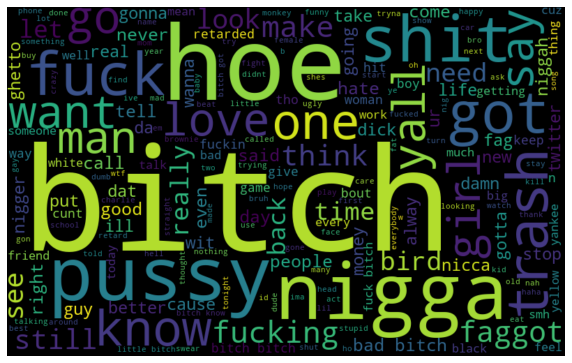

In [18]:
# visualize most frequent words in all tweets

from wordcloud import WordCloud

all_words = ' '.join([text for text in data_tweet['clean_tweets'] ])
wordcloud = WordCloud(width = 800, height = 500).generate(all_words)
plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [19]:
# overall tweet sentiment

overall_sentiment = TextBlob(str(lemmatization)).sentiment[0]
overall_sentiment

# 1: positive
# -1: negative

-0.06493506493506492

In [20]:
# convert the tweets into statistical numbers

vectorizer = TfidfVectorizer(ngram_range = (1, 4), max_features = 10000, use_idf = True)
tfidf = vectorizer.fit_transform(lemmatization)
tfidf

<24783x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 188100 stored elements in Compressed Sparse Row format>

In [21]:
# data split

X = tfidf
y = data_tweet['class'].astype(int)
x_train_tfidf, x_test_tfidf, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [22]:
# Logistic Regression 

model_lr = LogisticRegression(C = 2, max_iter = 500).fit(x_train_tfidf, y_train)
y_pred = model_lr.predict(x_test_tfidf)
report_lr = classification_report(y_test, y_pred)

print(report_lr)
acc_lr = accuracy_score(y_test, y_pred)
label_lr = "Logistic Regression"
print(label_lr)
print('Accuracy: ', acc_lr)

              precision    recall  f1-score   support

           0       0.55      0.19      0.28       427
           1       0.92      0.96      0.94      5747
           2       0.84      0.83      0.84      1261

    accuracy                           0.90      7435
   macro avg       0.77      0.66      0.69      7435
weighted avg       0.88      0.90      0.88      7435

Logistic Regression
Accuracy:  0.8965702757229321


In [23]:
# Decision Tree

model_dt = tree.DecisionTreeClassifier().fit(x_train_tfidf, y_train)
y_pred = model_dt.predict(x_test_tfidf)
report_dt = classification_report(y_test, y_pred)

print(report_dt)
acc_dt = accuracy_score(y_test, y_pred)
label_dt = 'Decision Tree'
print(label_dt)
print('Accuracy: ', acc_dt)

              precision    recall  f1-score   support

           0       0.32      0.27      0.29       427
           1       0.91      0.93      0.92      5747
           2       0.83      0.78      0.80      1261

    accuracy                           0.87      7435
   macro avg       0.69      0.66      0.67      7435
weighted avg       0.86      0.87      0.87      7435

Decision Tree
Accuracy:  0.8689979825151312


In [24]:
# kNN

model_knn = KNeighborsClassifier(n_neighbors = 3, weights = 'distance', p = 1).fit(x_train_tfidf, y_train)
y_pred = model_knn.predict(x_test_tfidf)
report_knn = classification_report(y_test, y_pred)

print(report_knn)
acc_knn = accuracy_score(y_test, y_pred)
label_knn = 'K-nearest Neighbors'
print(label_knn)
print('Accuracy: ', acc_knn)

              precision    recall  f1-score   support

           0       0.40      0.18      0.24       427
           1       0.81      0.97      0.88      5747
           2       0.74      0.24      0.36      1261

    accuracy                           0.80      7435
   macro avg       0.65      0.46      0.50      7435
weighted avg       0.78      0.80      0.76      7435

K-nearest Neighbors
Accuracy:  0.7966375252185609


In [25]:
# Random Forest

model_rf = RandomForestClassifier(n_estimators = 200).fit(x_train_tfidf, y_train)
y_pred = model_rf.predict(x_test_tfidf)
report_rf = classification_report(y_test, y_pred)

print(report_rf)
acc_rf = accuracy_score(y_test, y_pred)
label_rf = 'Random Forest'
print(label_rf)
print('Accuracy: ', acc_rf)

              precision    recall  f1-score   support

           0       0.52      0.15      0.23       427
           1       0.91      0.96      0.94      5747
           2       0.84      0.83      0.83      1261

    accuracy                           0.89      7435
   macro avg       0.76      0.65      0.67      7435
weighted avg       0.88      0.89      0.88      7435

Random Forest
Accuracy:  0.893207800941493


In [26]:
# SVM

model_svm = LinearSVC().fit(x_train_tfidf, y_train)
y_pred = model_svm.predict(x_test_tfidf)
report_svm = classification_report(y_test, y_pred)

print(report_svm)
acc_svm = accuracy_score(y_test, y_pred)
label_svm = 'SVM'
print(label_svm)
print('Accuracy: ', acc_svm)

              precision    recall  f1-score   support

           0       0.45      0.22      0.30       427
           1       0.92      0.95      0.93      5747
           2       0.81      0.81      0.81      1261

    accuracy                           0.89      7435
   macro avg       0.73      0.66      0.68      7435
weighted avg       0.87      0.89      0.88      7435

SVM
Accuracy:  0.8852723604572966


In [27]:
# Naive Bayes

x_train_tfidf, x_test_tfidf, y_train, y_test = train_test_split(X.toarray(), y, random_state = 42, test_size = 0.3)
model_nb = GaussianNB().fit(x_train_tfidf, y_train)
y_pred = model_nb.predict(x_test_tfidf)
report_nb = classification_report(y_test, y_pred)

print(report_nb)
acc_nb = accuracy_score(y_test, y_pred)
label_nb = 'Naive Bayes'
print(label_nb)
print('Accuracy: ', acc_nb)

              precision    recall  f1-score   support

           0       0.11      0.32      0.16       427
           1       0.88      0.75      0.81      5747
           2       0.54      0.55      0.55      1261

    accuracy                           0.69      7435
   macro avg       0.51      0.54      0.50      7435
weighted avg       0.78      0.69      0.73      7435

Naive Bayes
Accuracy:  0.6890383322125084


In [54]:
# summary of modelling results

d0 = pd.DataFrame([label_lr, label_dt, label_knn, label_rf, label_svm, label_nb])
d1 = pd.DataFrame([acc_lr, acc_dt, acc_knn, acc_rf, acc_svm, acc_nb])
d2 = pd.concat([d0, d1], axis = 1)
d2.columns = ['Model', 'Accuracy']
d2 = d2.sort_values(by = ['Accuracy'], ascending = False)

display(d2)
print('The best model is', d2.iloc[0, 0])

,Model,Accuracy
0,Logistic Regression,0.896570
3,Random Forest,0.893208
4,SVM,0.885272
1,Decision Tree,0.868998
2,K-nearest Neighbors,0.796638
5,Naive Bayes,0.689038


The best model is Logistic Regression
